In [26]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [27]:
# Carrega a base
dataset = pd.read_csv("/content/Pos MLs04c SalesData.csv")
dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Definição do modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

In [45]:
# Compilação do modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mae'])

In [46]:
# Treinando o modelo
epochs_hist = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 19.5960 - mae: 19.5960 - val_loss: 19.7785 - val_mae: 19.7785
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 19.5713 - mae: 19.5713 - val_loss: 19.8055 - val_mae: 19.8055
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 19.5786 - mae: 19.5786 - val_loss: 19.7889 - val_mae: 19.7889
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 19.5815 - mae: 19.5815 - val_loss: 19.7204 - val_mae: 19.7204
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 19.5781 - mae: 19.5781 - val_loss: 19.7666 - val_mae: 19.7666
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 19.5756 - mae: 19.5756 - val_loss: 19.7751 - val_mae: 19.7751
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 19.5897 - mae: 19.5897 - val_loss: 19.8190 - val_mae: 19.8190
Epoch 8/500
10/10 [==============================] - 0

In [47]:
# Avaliação do modelo
loss = model.evaluate(X_test, y_test)
print(f"Perda: {loss}")

4/4 [==============================] - 0s 4ms/step - loss: 19.6500 - mae: 19.6500
Perda: [19.650047302246094, 19.650047302246094]


In [48]:
model.get_weights()

[array([[ 1.1828953e+00,  3.7403208e-01,  3.9148171e-02,  1.3106582e+00,
         -1.5947145e+00,  4.0021401e-02,  6.8725455e-01,  3.3025214e-01,
          1.0405008e-02,  4.5653200e-01, -1.6050308e+00,  1.2602338e+00,
          2.4038827e-01, -1.5931282e+00,  1.3790731e+00,  4.0978589e+00,
          4.1111109e-01,  1.3245335e+00,  1.3328683e+00,  6.3195282e-01,
          1.3708488e+00,  6.6520870e-01,  1.4111506e+00,  1.1315595e+00,
          1.4456805e+00,  1.3770041e+00,  1.1649312e+00,  4.2949560e-01,
          5.3669367e-04,  1.1609105e+00,  8.4008807e-01,  4.2823062e+00,
          9.8843465e-04,  2.8005105e-01,  1.4295691e+00, -1.6452702e+00,
          9.8987621e-01,  7.8320276e-04,  1.3837672e+00,  4.7897547e-01,
          8.8526529e-01,  1.2216816e+00,  1.4605782e+00, -3.0306561e-03,
          4.8792130e-01,  1.3554602e+00,  3.9652342e-01,  3.9413139e-01,
          1.1386267e+00,  3.8226235e-03,  1.0756303e+00, -1.6257827e+00,
          1.3997711e+00, -3.4115543e-03,  1.3989367

In [49]:
# Previsões
predictions = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [50]:
# Calcula R2 score
# Proporção de variância
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2}")

R2 Score: 0.9759645082408859


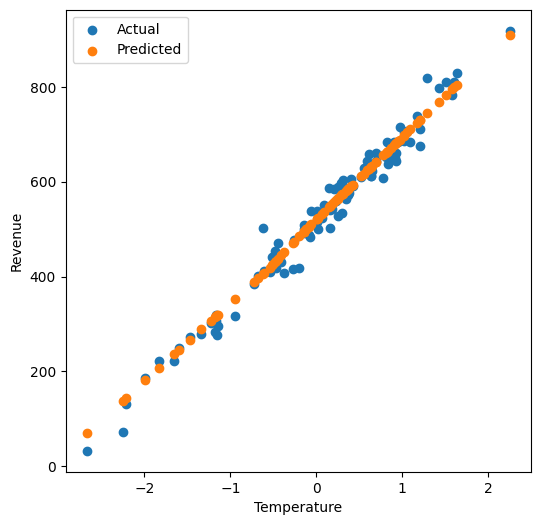

In [51]:
# Plota Actual VS Predicted
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predictions, label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()